# Standardizing data

When we collect data different variables are expressed in different units or scales. Some data are recorded in naturally, meaningful units that we might be quite familiar with: 

* Height of adults in cm
* Temperature in $^{\circ}C$
* Cost of a pint in GBP (£)

However, in many other situations, the units are less intuitive — for instance:

* scores on an IQ test marked out of 180
* height of 2-year-olds in cm
* price of hospital visit in USD ($)

A further complication occurs when we are trying to quantify how unusual a data value is when values are presented as different units
* High school grades from different countries or systems (A-levels vs IB vs Abitur vs.....)


Across all of these cases, it can be helpful to express data in standardized units, which allows us to compare values across different scales or measurements.

Two common ways of standardizing data are:
1) Convert data to Z-scores - *measuring how many standard deviations a value is from the mean*
2) Convert data to quantiles - *expressing values in terms of their percentile position within the distribution*

In this section we will review both these approaches.


**Here is a video about standardizing data using centiles**

In [10]:
%%HTML
<iframe width="560" height="315" src="https://www.youtube.com/embed/i162CImD2BI?si=AKYH2absqZ6n8WLG" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" referrerpolicy="strict-origin-when-cross-origin" allowfullscreen></iframe>

**Here is a video about standardizing data using Z-Scores**

In [11]:
%%HTML
<iframe width="560" height="315" src="https://www.youtube.com/embed/SPgQ_D0I_q4?si=YvukrU2VD6iZSTKQ" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" referrerpolicy="strict-origin-when-cross-origin" allowfullscreen></iframe>

### Set up Python Libraries

As usual you will need to run this code block to import the relevant Python libraries

In [12]:
# Set-up Python libraries - you need to run this but you don't need to change it
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
import seaborn as sns
sns.set_theme(style='white')
import statsmodels.api as sm
import statsmodels.formula.api as smf

### Import a dataset to work with

Let's look at a fictional dataset containing some body measurements for 50 individuals

In [13]:
data=pd.read_csv('https://raw.githubusercontent.com/jillxoreilly/StatsCourseBook_2024/main/data/BodyData.csv')
display(data)

ID sex  height  weight  age
0   101708   M     161    64.8   35
1   101946   F     165    68.1   42
2   108449   F     175    76.6   31
3   108796   M     180    81.0   31
4   113449   F     179    80.1   31
5   114688   M     172    74.0   42
6   119187   F     148    54.8   45
7   120679   F     160    64.0   44
8   120735   F     188    88.4   32
9   124269   F     172    74.0   29
10  124713   M     175    76.6   26
11  127076   M     180    81.0   28
12  131626   M     162    65.6   35
13  132218   M     170    72.3   29
14  132609   F     172    74.0   41
15  134660   F     159    63.2   34
16  135195   M     169    71.4   42
17  140073   F     168    70.6   34
18  140114   M     195    95.1   41
19  145185   F     157    61.6   45
20  146279   F     180    81.0   30
21  146519   F     172    74.0   34
22  151451   F     171    73.1   37
23  152597   M     172    74.0   27
24  154672   M     167    69.7   39
25  155594   F     165    68.1   25
26  158165   M     175    76.6   45
27  159457   F     176    77.4   36
28  162323   M     173    74.8   31
29  166948   M     174    75.7   28
30  168411   M     175    76.6   29
31  168574   F     163    66.4   30
32  169209   F     159    63.2   45
33  171236   F     164    67.2   34
34  172289   M     181    81.9   27
35  173925   M     189    89.3   25
36  176598   F     169    71.4   37
37  177002   F     180    81.0   36
38  178659   M     181    81.9   26
39  180992   F     177    78.3   31
40  183304   F     176    77.4   30
41  184706   M     183    83.7   40
42  185138   M     169    71.4   28
43  185223   F     170    72.3   41
44  186041   M     175    76.6   25
45  186887   M     154    59.3   26
46  187016   M     161    64.8   32
47  198157   M     180    81.0   33
48  199112   M     172    74.0   33
49  199614   F     164    67.2   31

## Z score

A Z-score tells us how many standard deviations a particular value lies above or below the mean of its distribution. This transformation helps us understand how unusual a given value is relative to the rest of the data — regardless of the original measurement units. For example, a Z-score of +2 means the value is two standard deviations above the mean, while a score of –1.5 means it’s 1.5 standard deviations below the mean.


Let's convert our weights to Z-scores. We will need to know the mean and standard deviation of weight:

In [15]:
print(data.weight.mean())
print(data.weight.std())

73.73
7.891438140058334


 To give you some instinct for Z-score let's consider some examples:

* Someone whose weight is exactly on the mean (73.73kg) will have a Z-score of 0.
* Someone whose weight is one standard deviation below the mean (65.83kg) will have a Z-score of -1 etc.


We will calculate a Z-score for each person's weight. To do this we will create a new column in our dataframe called `WeightZ`. Z score is calculated as:

$$Z = \frac{X - \text{Mean}}{\text{SD}}$$



In [18]:
# Create a new column and put the calcualted z-scores in it
data['WeightZ'] = (data.weight - data.weight.mean())/data.weight.std()
data

ID sex  height  weight  age   WeightZ
0   101708   M     161    64.8   35 -1.131606
1   101946   F     165    68.1   42 -0.713431
2   108449   F     175    76.6   31  0.363685
3   108796   M     180    81.0   31  0.921252
4   113449   F     179    80.1   31  0.807204
5   114688   M     172    74.0   42  0.034214
6   119187   F     148    54.8   45 -2.398802
7   120679   F     160    64.0   44 -1.232982
8   120735   F     188    88.4   32  1.858977
9   124269   F     172    74.0   29  0.034214
10  124713   M     175    76.6   26  0.363685
11  127076   M     180    81.0   28  0.921252
12  131626   M     162    65.6   35 -1.030230
13  132218   M     170    72.3   29 -0.181209
14  132609   F     172    74.0   41  0.034214
15  134660   F     159    63.2   34 -1.334358
16  135195   M     169    71.4   42 -0.295257
17  140073   F     168    70.6   34 -0.396632
18  140114   M     195    95.1   41  2.707998
19  145185   F     157    61.6   45 -1.537109
20  146279   F     180    81.0   30  0.921252
21  146519   F     172    74.0   34  0.034214
22  151451   F     171    73.1   37 -0.079833
23  152597   M     172    74.0   27  0.034214
24  154672   M     167    69.7   39 -0.510680
25  155594   F     165    68.1   25 -0.713431
26  158165   M     175    76.6   45  0.363685
27  159457   F     176    77.4   36  0.465061
28  162323   M     173    74.8   31  0.135590
29  166948   M     174    75.7   28  0.249638
30  168411   M     175    76.6   29  0.363685
31  168574   F     163    66.4   30 -0.928855
32  169209   F     159    63.2   45 -1.334358
33  171236   F     164    67.2   34 -0.827479
34  172289   M     181    81.9   27  1.035299
35  173925   M     189    89.3   25  1.973024
36  176598   F     169    71.4   37 -0.295257
37  177002   F     180    81.0   36  0.921252
38  178659   M     181    81.9   26  1.035299
39  180992   F     177    78.3   31  0.579109
40  183304   F     176    77.4   30  0.465061
41  184706   M     183    83.7   40  1.263395
42  185138   M     169    71.4   28 -0.295257
43  185223   F     170    72.3   41 -0.181209
44  186041   M     175    76.6   25  0.363685
45  186887   M     154    59.3   26 -1.828564
46  187016   M     161    64.8   32 -1.131606
47  198157   M     180    81.0   33  0.921252
48  199112   M     172    74.0   33  0.034214
49  199614   F     164    67.2   31 -0.827479

Look down the table for some heavy and light people. Do their z-scores look like you would expect?

## Z-score Rule of Thumb

The Z-score tells us how many standard deviations above or below the mean a datapoint lies. This makes it very useful for identifying unusually high or low values within a dataset. When data is approximately *normal* you can easily infer a lot of information about a particular data-point based on its Z-Score. Specifically, we can use this handy rule-of-thumb to know how unusual a Z-score is:

*Don't worry if you don't know what the Normal distribution is yet - you will learn about this in detail later in the course*

* Z-Score of 0 is higher than 50% of values
* Z-Score of 1 is higher than 85% of values
* Z-Score of 2 is higher than 97.5% of values
    
<img src="https://raw.githubusercontent.com/jillxoreilly/StatsCourseBook_2024/main/images/MT_wk3_ZscoreRuleOfThumb.png" width=75% />


## Z-score Disadvantages

However, the Z-score does have a couple of disadvantages:

* The Z-score is not easily understood by non statistically trained people
* Z-scores are only meaningful if the data are approximately normally distributed, for data that are strongly skewed or contain outliers, the mean and standard deviation may not accurately reflect the typical values

<img src="https://raw.githubusercontent.com/jillxoreilly/StatsCourseBook_2024/main/images/MT_wk3_ZscoreSkew.png" width=75% />


    
    
It is therefore sometimes more meaningful to standardize data by presenting them as *quantiles*


## Quantiles

Quantiles (also called centiles or percentiles) tell us what proportion of data points fall below or above a given value.
They’re an intuitive way to describe where a particular observation lies within a distribution.

For example, imagine my two-year-old son is 85 cm tall and 14kg. *Would you say he is big for his age?* You probably have no idea, because unlike adult sizes, most of us don't have a good sense of the size distribution two-year-olds. 

In fact, the two-year-old described here lies on the 25th centile for height and the 91st centile for weight, this means he is only taller than 25% of boys the same age but he weighs more than 91%. 

To calculate a given quantile of a dataset we use `df.quantile()`, e.g., to find the 90th centile of the heights in our data set: 

In [24]:
# find the 90th centile for height in out dataframe
data.height.quantile(q=0.9) # get 90th centile

np.float64(181.0)

The 90th centile is 181cm, ie 10% of people are taller than 181cm.

Adding quantile information to a dataset can be done using `pd.qcut()`, which divides the data into equal-sized groups (quantiles) and assigns each observation to one of them.

For example, we can categorize people’s weights into deciles. **Deciles are 10ths, in the same way that centiles are 100ths.**

* if someone's weight in the 0th decile, that means their weight is in the bottom 10% of the sample
* if someone's weight is in the 9th decile, it mmeans they are in the top 10% ot the sample (heavier than 90% of people)

Here we add deciles to the data frame in a new variable called `weightQ`:

In [25]:
data['weightQ'] = pd.qcut(data.weight, 10, labels = False) 
data

ID sex  height  weight  age   WeightZ  weightQ
0   101708   M     161    64.8   35 -1.131606        1
1   101946   F     165    68.1   42 -0.713431        2
2   108449   F     175    76.6   31  0.363685        6
3   108796   M     180    81.0   31  0.921252        7
4   113449   F     179    80.1   31  0.807204        7
5   114688   M     172    74.0   42  0.034214        4
6   119187   F     148    54.8   45 -2.398802        0
7   120679   F     160    64.0   44 -1.232982        1
8   120735   F     188    88.4   32  1.858977        9
9   124269   F     172    74.0   29  0.034214        4
10  124713   M     175    76.6   26  0.363685        6
11  127076   M     180    81.0   28  0.921252        7
12  131626   M     162    65.6   35 -1.030230        1
13  132218   M     170    72.3   29 -0.181209        3
14  132609   F     172    74.0   41  0.034214        4
15  134660   F     159    63.2   34 -1.334358        0
16  135195   M     169    71.4   42 -0.295257        3
17  140073   F     168    70.6   34 -0.396632        3
18  140114   M     195    95.1   41  2.707998        9
19  145185   F     157    61.6   45 -1.537109        0
20  146279   F     180    81.0   30  0.921252        7
21  146519   F     172    74.0   34  0.034214        4
22  151451   F     171    73.1   37 -0.079833        4
23  152597   M     172    74.0   27  0.034214        4
24  154672   M     167    69.7   39 -0.510680        2
25  155594   F     165    68.1   25 -0.713431        2
26  158165   M     175    76.6   45  0.363685        6
27  159457   F     176    77.4   36  0.465061        7
28  162323   M     173    74.8   31  0.135590        5
29  166948   M     174    75.7   28  0.249638        5
30  168411   M     175    76.6   29  0.363685        6
31  168574   F     163    66.4   30 -0.928855        1
32  169209   F     159    63.2   45 -1.334358        0
33  171236   F     164    67.2   34 -0.827479        2
34  172289   M     181    81.9   27  1.035299        8
35  173925   M     189    89.3   25  1.973024        9
36  176598   F     169    71.4   37 -0.295257        3
37  177002   F     180    81.0   36  0.921252        7
38  178659   M     181    81.9   26  1.035299        8
39  180992   F     177    78.3   31  0.579109        7
40  183304   F     176    77.4   30  0.465061        7
41  184706   M     183    83.7   40  1.263395        9
42  185138   M     169    71.4   28 -0.295257        3
43  185223   F     170    72.3   41 -0.181209        3
44  186041   M     175    76.6   25  0.363685        6
45  186887   M     154    59.3   26 -1.828564        0
46  187016   M     161    64.8   32 -1.131606        1
47  198157   M     180    81.0   33  0.921252        7
48  199112   M     172    74.0   33  0.034214        4
49  199614   F     164    67.2   31 -0.827479        2

**NOTE** this is a bit fiddly as `df.qcut` won't create empty bins. Since this dataset is quite small, we can't create one bin for each centile as naturally some will be empty (as there are less than 100 datapoints)

To visualise our new variable, we will use a scatterplot, where each data point shows an individuals `weight` and and the associated `weightQ`

<Axes: xlabel='weightQ', ylabel='weight'>

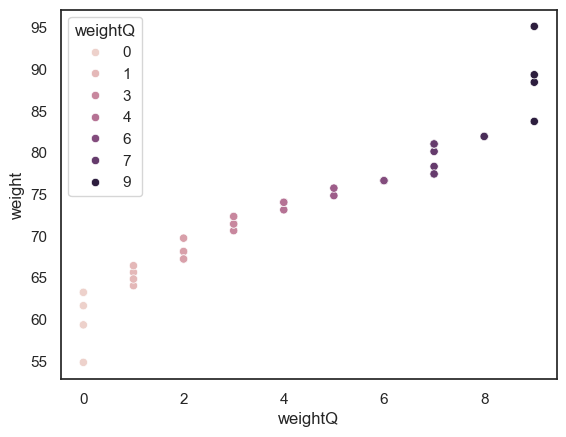

In [28]:
sns.scatterplot(data = data, x = "weightQ",  y = "weight", hue = "weightQ")